<p align="center"><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true"></p><h1><font color='0B5345'> <center>

HACK CHALLENGE

</center></font></h1>
<h2><font color='0B5345'> <center>
Reto ciencia de datos</center></font></h2>
<font  face="Courier New" size="3">
<p2> <center>Isabella Ariza - Eduardo Montoya - Juliana Moreno - Santiago Gonzalez - Luisa Zapata</center></p2>
<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>

### Análisis exploratorio

In [5]:
# Importar librerías para visualización y gestión de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # Librerías para generar el modelo

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import confusion_matrix

In [6]:
data = pd.read_csv("Occupancy_Estimation.csv",sep=",")
data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.000000,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.000000,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.000000,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.000000,0,0,0


In [7]:
print(f'El números de registros es {data.shape[0]} y variables es {data.shape[1]}')


El números de registros es 10129 y variables es 19


### Limpieza de datos

In [8]:
## Verificación de filas o columnas vacias
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

### Análisis descriptivo

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
S1_Temp,10129.0,25.454012,0.351351,24.940000,25.190000,25.38,25.63,26.380000
S2_Temp,10129.0,25.546059,0.586325,24.750000,25.190000,25.38,25.63,29.000000
S3_Temp,10129.0,25.056621,0.427283,24.440000,24.690000,24.94,25.38,26.190000
S4_Temp,10129.0,25.754125,0.356434,24.940000,25.440000,25.75,26.00,26.560000
S1_Light,10129.0,25.445059,51.011264,0.000000,0.000000,0.00,12.00,165.000000
S2_Light,10129.0,26.016290,67.304170,0.000000,0.000000,0.00,14.00,258.000000
S3_Light,10129.0,34.248494,58.400744,0.000000,0.000000,0.00,50.00,280.000000
S4_Light,10129.0,13.220259,19.602219,0.000000,0.000000,0.00,22.00,74.000000
S1_Sound,10129.0,0.168178,0.316709,0.060000,0.070000,0.08,0.08,3.880000
S2_Sound,10129.0,0.120066,0.266503,0.040000,0.050000,0.05,0.06,3.440000


### Distribuciones de probabilidad

16


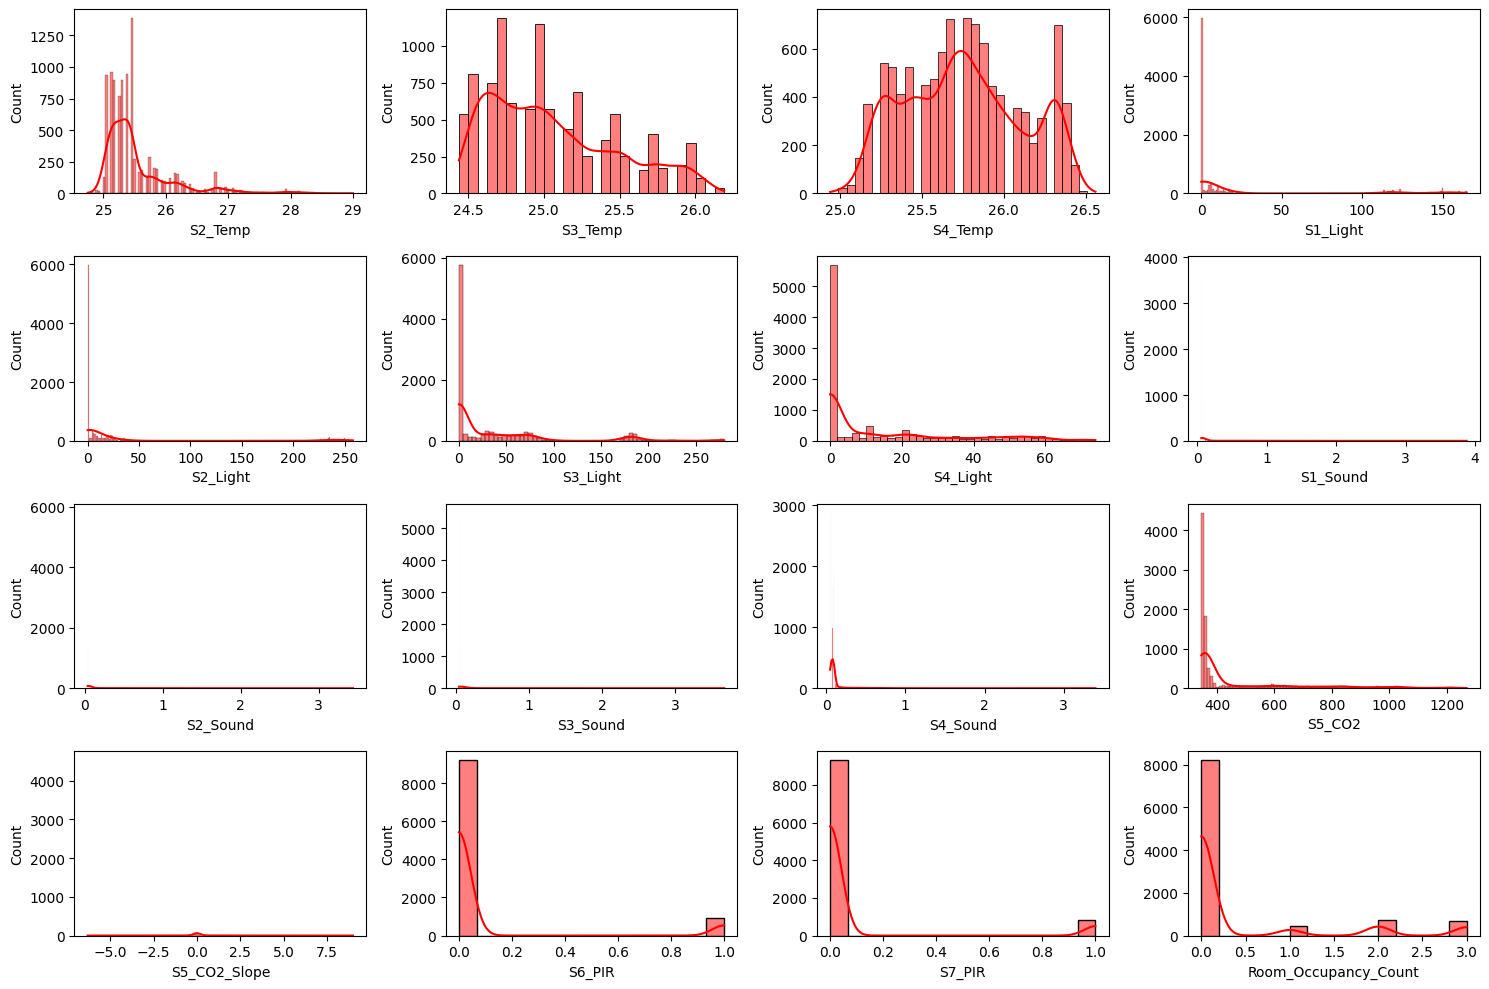

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(15, 10))

columnas = data.columns.tolist()
columnas = columnas[3:]
print(len(columnas))

for i, columna in enumerate(columnas):
    fila = i // 4
    col = i % 4
    sns.histplot(data[columna], kde = True,color='r',ax=axes[fila, col])
plt.tight_layout()

plt.show()


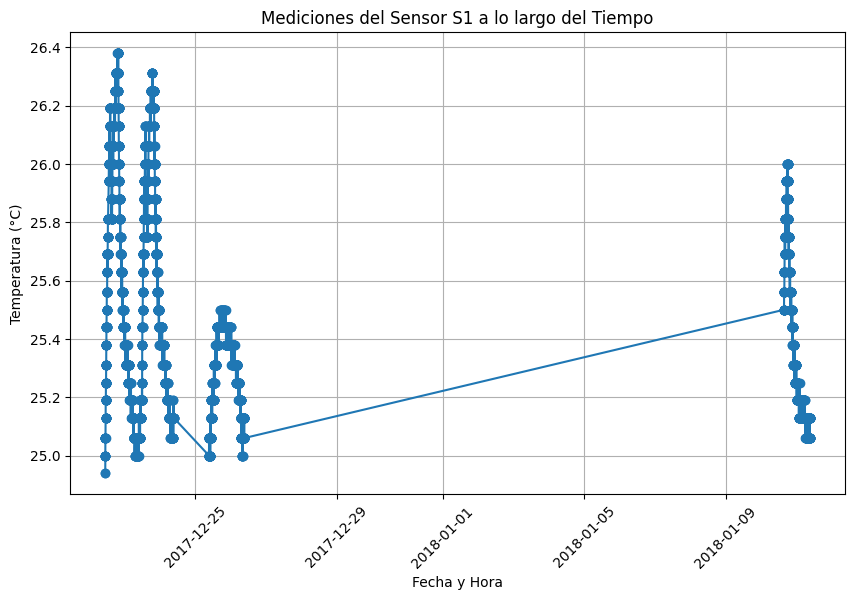

In [16]:
data['DateTime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Ordenar los datos por la columna 'DateTime' (en caso de que no estén ordenados)
data = data.sort_values('DateTime')

# Graficar la medida del sensor en función del tiempo
plt.figure(figsize=(10, 6))
plt.plot(data['DateTime'], data['S1_Temp'], marker='o', linestyle='-')
plt.title('Mediciones del Sensor S1 a lo largo del Tiempo')
plt.xlabel('Fecha y Hora')
plt.ylabel('Temperatura (°C)')
plt.xticks(rotation=45)  # Rotar los valores del eje x para mejorar la legibilidad
plt.grid(True)
plt.show()

### Tratamiento de valores en cero

In [100]:
cols= data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    zero_values = len(data[data[col] <= 0])
    print("Numero de observaciones menores o iguales a cero en la columna {} son {}".format(col,zero_values))

Numero de observaciones menores o iguales a cero en la columna Glucose son 5
Numero de observaciones menores o iguales a cero en la columna BloodPressure son 35
Numero de observaciones menores o iguales a cero en la columna SkinThickness son 227
Numero de observaciones menores o iguales a cero en la columna Insulin son 374
Numero de observaciones menores o iguales a cero en la columna BMI son 11


No tiene sentido que  estas variables tengan valores en cero, sin embargo no se quiere perder estos datos, una opción es reemplazar los valores en cero por la mediana de esa variables.

In [101]:
cols= data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    median = data[col].median()
    data.loc[data[col]<=0,col] = median

In [102]:
cols= data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]
for col in cols:
    zero_values = len(data[data[col] <= 0])
    print("Numero de observaciones menores o iguales a cero en la columna {} son {}".format(col,zero_values))

Numero de observaciones menores o iguales a cero en la columna Glucose son 0
Numero de observaciones menores o iguales a cero en la columna BloodPressure son 0
Numero de observaciones menores o iguales a cero en la columna SkinThickness son 0
Numero de observaciones menores o iguales a cero en la columna Insulin son 0
Numero de observaciones menores o iguales a cero en la columna BMI son 0


### Detección de datos atípicos

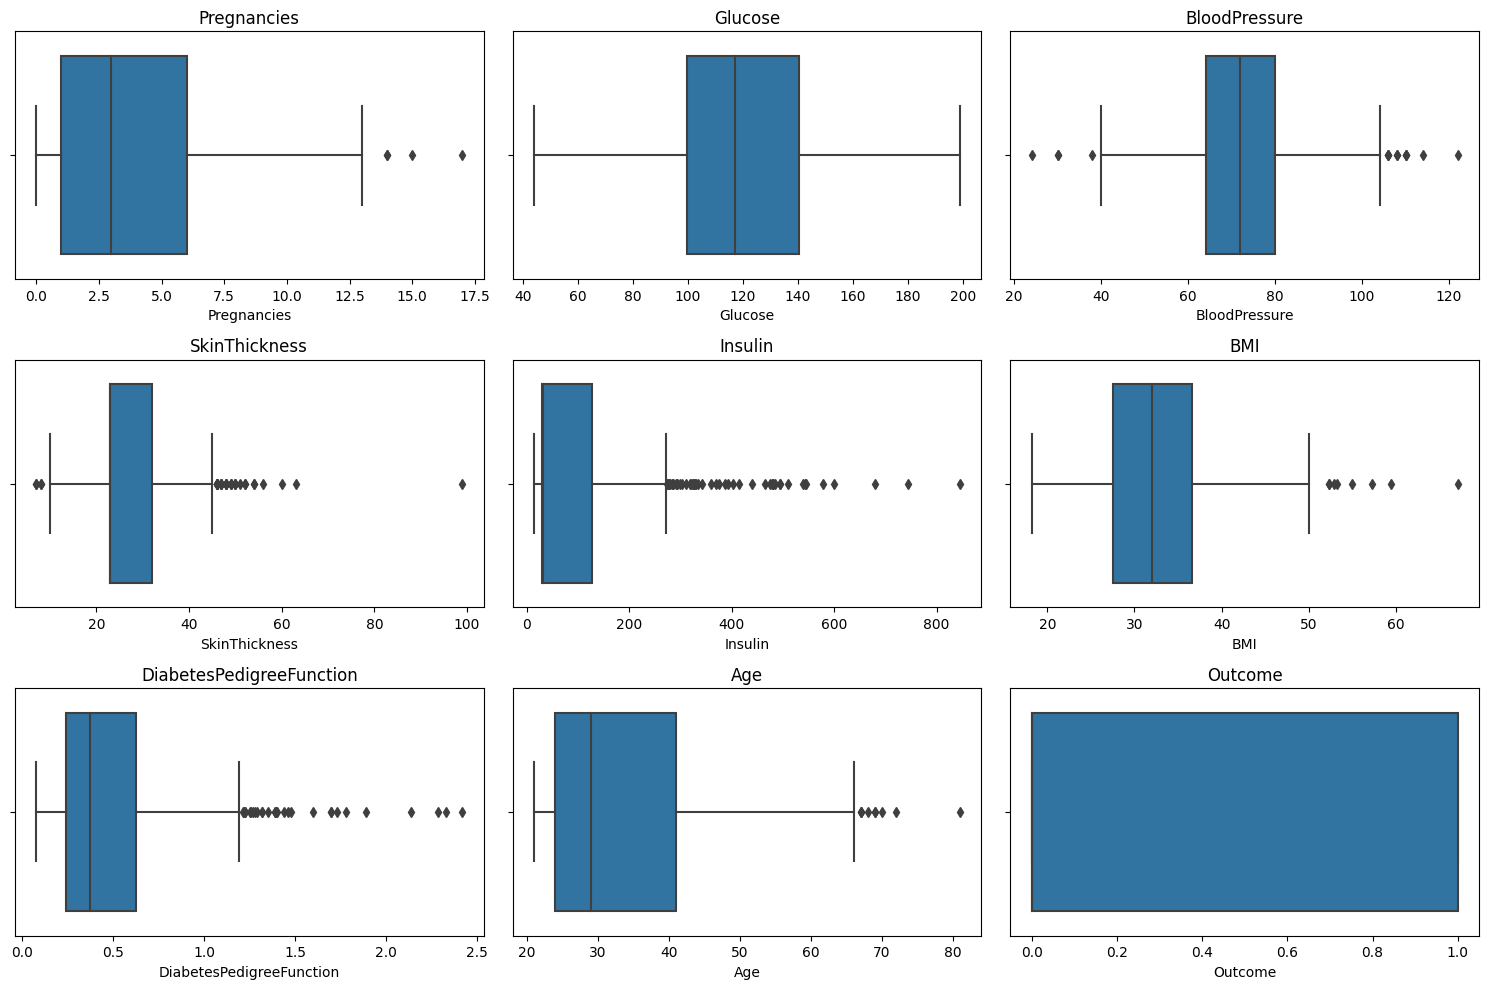

In [103]:
int_vars = data.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    sns.boxplot(x=var,data=data,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

In [104]:
outliers=['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin','BMI',
                        'DiabetesPedigreeFunction','Age']

##### Función para eliminar datos atípicos

In [105]:
def remove_outliers_iqr(data):
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    data = np.where(data>upper_bound, upper_bound, np.where(data<lower_bound,lower_bound,data))
    return data[(data >= lower_bound) & (data <= upper_bound)]

In [106]:
for i in data.columns:
    data[i]=remove_outliers_iqr(data[i])

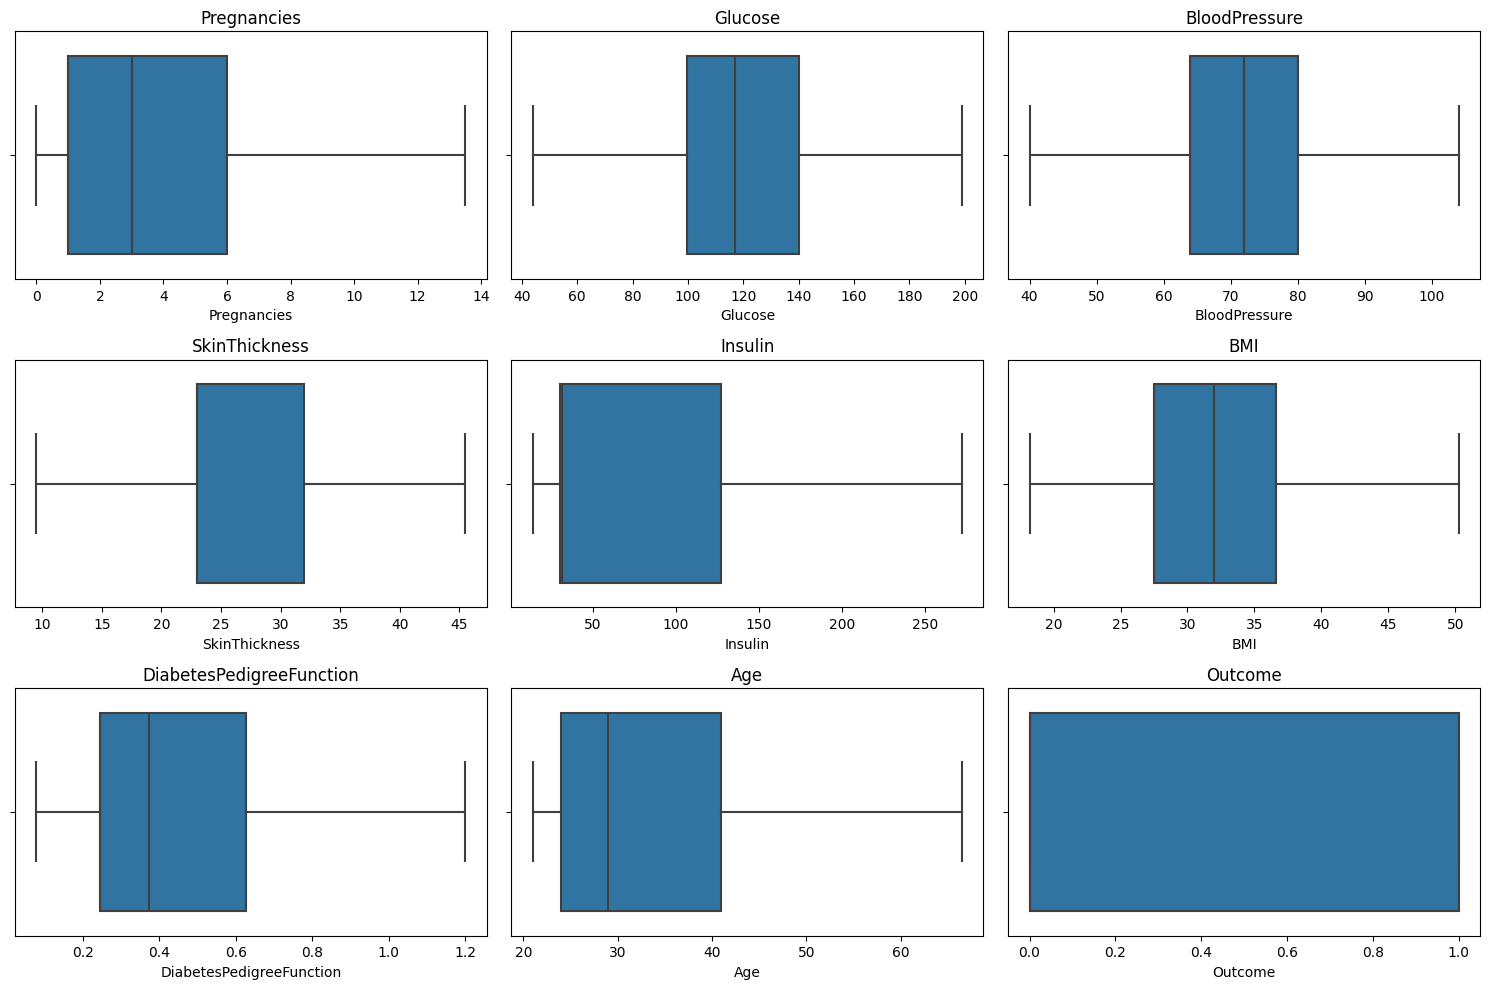

In [107]:
int_vars = data.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (data):
    sns.boxplot(x=var,data=data,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

### Matriz de correlación

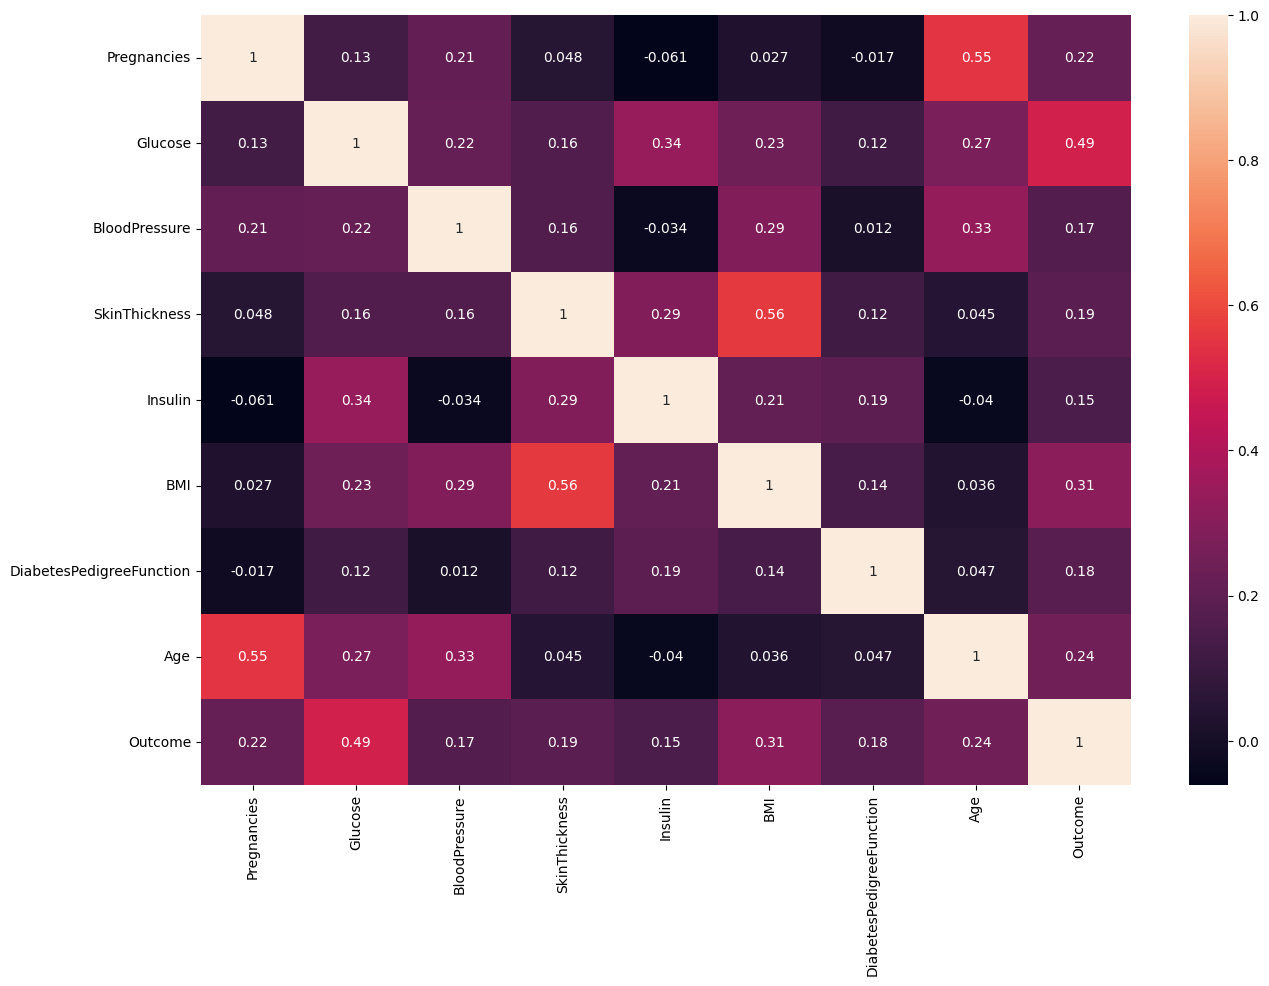

In [108]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),fmt='.2g',annot=True)
plt.show()

### **Cálculo de métricas de evaluación**
_________________________

<p align="center">
  <img src="https://www.tutorialexample.com/wp-content/uploads/2022/01/how-to-compute-accuracy-precision-recall-and-f1-score-in-machine-learning.png" alt="Matriz de confusión">
</p>

In [113]:
# Calcular la precisión del modelo
precision = precision_score(y_test, y_pred)
# Calcular la exactitud
exactitud = accuracy_score(y_test, y_pred)
# Calcular el recall
recall = recall_score(y_test, y_pred)
# Calcular el F1-score
f1 = f1_score(y_test, y_pred)


print(f'Exactitud: {exactitud:.2f}')
print(f'Precisión: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Exactitud: 0.73
Precisión: 0.72
Recall: 0.49
F1-score: 0.59
